# Métricas de clasificación
## Elaborado por: Martín Ordóñez


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [3]:
df = pd.read_csv('/Users/matin/Library/Mobile Documents/com~apple~CloudDocs/Coding Dojo Python/Track Machine Learning I/Introducción to Machine Learning/Regresión Logística/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,...,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [5]:
df['y_yes'].value_counts(dropna = False)

0    4000
1     521
Name: y_yes, dtype: int64

In [6]:
# Organizar los datos en la matriz de características y el vector de destino
X = df.loc[:, df.columns[(df.columns != 'y_yes')]]
y = df.loc[:, 'y_yes'].values

In [8]:
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 2799, 1: 365}

In [10]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Precisión**

In [11]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Testing accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.8934892541087232
Testing accuracy: 0.8828297715549005


**Sensibilidad**

In [12]:
y_pred_test=log_reg.predict(X_test)
y_pred_train=log_reg.predict(X_train)

In [13]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred_test)
print(cm1)

[[1173   28]
 [ 131   25]]


In [14]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_train,y_pred_train)
print(cm2)

[[2746   53]
 [ 284   81]]


In [15]:
total1=sum(sum(cm1))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Training sensitivity : ', sensitivity2 )
print('Testing sensitivity : ', sensitivity1 )


Training sensitivity :  0.9810646659521257
Testing sensitivity :  0.9766860949208993


**Especificidad**

In [16]:
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Training Specificity : ', specificity2)
print('Testing Specificity : ', specificity1)

Training Specificity :  0.2219178082191781
Testing Specificity :  0.16025641025641027


**AUC**

In [17]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, log_reg.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8646845497658167
Testing AUC: 0.8434851299131065


**ROC**

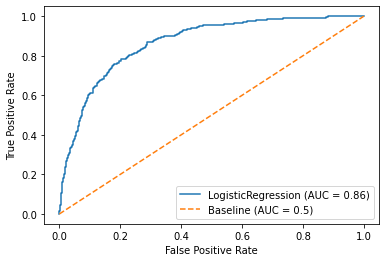

In [19]:
# Visualizar la curva ROC
plot_roc_curve(log_reg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

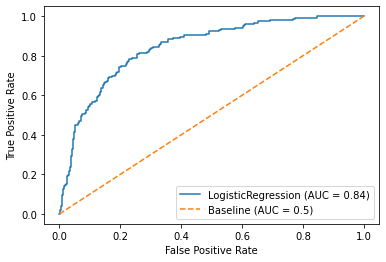

In [20]:
# Visualizar la curva ROC
plot_roc_curve(log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

Importa que tan bien clasificado esté una persona es decir el nivel de precision ya que se busca entender que tan efectiva fue la campaña de marketing. Sin embargo la curva ROC tambien es muy útil ya que permite relacionar facilmente los verdaderos positivos con los falsos positivos.

El modelo es muy parecido en todas las métricas excepto en la especificidad.

Se podria tratar de categorizar a las personas por distintos atributos para evaluar la efectividad de la campaña por tipos de clientes. Así se podrían enfocar las campañas de distinta forma